In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/processed/data.csv', index_col=['user_id','book_id'])
data.head()

rating  book_cluster  \
user_id                          book_id                          
dc3763cdb9b2cae805882878eebb6a32 18471619       3           0.0   
bafc2d50014200cda7cb2b6acd60cd73 6315584        4           0.0   
                                 29847729       4           0.0   
                                 18454118       5           0.0   
                                 2239435        4           0.0   

                                           avg_rating_by_cluster  \
user_id                          book_id                           
dc3763cdb9b2cae805882878eebb6a32 18471619               3.000000   
bafc2d50014200cda7cb2b6acd60cd73 6315584                4.285714   
                                 29847729               4.285714   
                                 18454118               4.285714   
                                 2239435                4.285714   

                                           average_rating  num_pages  \
user_id                          book_id                               
dc3763cdb9b2cae805882878eebb6a32 18471619            3.26         93   
bafc2d50014200cda7cb2b6acd60cd73 6315584             4.07        304   
                                 29847729            4.17        160   
                                 18454118            4.07        200   
                                 2239435             3.20        240   

                                           publication_year  ratings_count  \
user_id                          book_id                                     
dc3763cdb9b2cae805882878eebb6a32 18471619              2014            181   
bafc2d50014200cda7cb2b6acd60cd73 6315584               2009            108   
                                 29847729              2012            110   
                                 18454118              2014             90   
                                 2239435               2008           4321   

                                           cluster  most_similar_book_avg_rtg  \
user_id                          book_id                                        
dc3763cdb9b2cae805882878eebb6a32 18471619        0                       3.72   
bafc2d50014200cda7cb2b6acd60cd73 6315584         0                       4.07   
                                 29847729        0                       4.01   
                                 18454118        0                       2.11   
                                 2239435         0                       3.33   

                                           2nd_similar_book_avg_rtg  \
user_id                          book_id                              
dc3763cdb9b2cae805882878eebb6a32 18471619                      3.50   
bafc2d50014200cda7cb2b6acd60cd73 6315584                       4.00   
                                 29847729                      4.01   
                                 18454118                      3.72   
                                 2239435                       3.20   

                                           3rd_similar_book_avg_rtg  \
user_id                          book_id                              
dc3763cdb9b2cae805882878eebb6a32 18471619                      4.26   
bafc2d50014200cda7cb2b6acd60cd73 6315584                       3.79   
                                 29847729                      4.36   
                                 18454118                      3.72   
                                 2239435                       3.20   

                                           review_sentiment_negative  \
user_id                          book_id                               
dc3763cdb9b2cae805882878eebb6a32 18471619                          0   
bafc2d50014200cda7cb2b6acd60cd73 6315584                           0   
                                 29847729                          0   
                                 18454118                          0   
                                 2239435        

# Scaling / Test_train_split

In [3]:
from sklearn.preprocessing import StandardScaler

# Define X,y
X = data.drop('rating', axis=1)
y = data.rating

# Preprocessing
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [4]:
# Split into training/testing sets
from sklearn.model_selection import train_test_split

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 2)

In [5]:
# Check shapes
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(385560, 13)
(289170, 13)
(96390, 13)


# Model 1: KNN

The first model I'll try is K-Nearest Neighbors. This is a very simple type of model, so I'm not expecting exceptional results from it at first. But it should give a good starting point.

In [6]:
# First will just run it "out of the box"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
knn = KNeighborsClassifier()
model_1 = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      2275
           1       0.26      0.18      0.21      1805
           2       0.30      0.26      0.28      6702
           3       0.39      0.45      0.42     20799
           4       0.50      0.56      0.53     34421
           5       0.71      0.59      0.64     30388

    accuracy                           0.52     96390
   macro avg       0.48      0.44      0.45     96390
weighted avg       0.53      0.52      0.52     96390



In [9]:
# KNN parameter tuning
from sklearn.model_selection import GridSearchCV

# Grid of parameters to test over
leaf_size = list(range(1,11,2))
n_neighbors = list(range(1,15,2))
p = [1,2]

param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

gs = GridSearchCV(knn, param_grid, verbose=5, cv=5, n_jobs=-1)

gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 24.3min
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed: 31.1min finished


In [10]:
print('Best parameters: {}'.format(gs_results.best_params_))

Best parameters: {'leaf_size': 3, 'n_neighbors': 13, 'p': 2}


In [11]:
knn = KNeighborsClassifier(leaf_size=3, n_neighbors=23, p=2)
model_1 = knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred1, digits=2))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68      2275
           1       0.50      0.11      0.18      1805
           2       0.42      0.20      0.27      6702
           3       0.44      0.46      0.45     20799
           4       0.51      0.66      0.57     34421
           5       0.74      0.60      0.67     30388

    accuracy                           0.55     96390
   macro avg       0.58      0.43      0.47     96390
weighted avg       0.57      0.55      0.55     96390



# Model 2: Decision Tree

Let's try decision tree algorithm.

In [14]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier(criterion='gini',max_depth=3)

model_2.fit(X_train, y_train)

y_pred2 = model_2.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred2, digits=2))

              precision    recall  f1-score   support

           0       0.96      0.53      0.68      2275
           1       0.00      0.00      0.00      1805
           2       0.00      0.00      0.00      6702
           3       0.40      0.52      0.45     20799
           4       0.49      0.68      0.57     34421
           5       0.79      0.54      0.64     30388

    accuracy                           0.54     96390
   macro avg       0.44      0.38      0.39     96390
weighted avg       0.53      0.54      0.52     96390



/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Decision tree parameter tuning
param_grid = {
    'max_depth' : np.arange(3,11,2),
    'criterion' : ['entropy','gini'],
    'min_samples_leaf' : np.arange(3,15,2)
}

tree = DecisionTreeClassifier()
gs2 = GridSearchCV(tree, param_grid, verbose=5, cv = 5, n_jobs=-1)

gs2_results = gs2.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   56.2s finished


In [17]:
print('Best parameters: {}'.format(gs2_results.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 13}


In [18]:
# Fit best parameters
tree = DecisionTreeClassifier(criterion='entropy',max_depth=9, min_samples_leaf=13)
model2 = tree.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred2, digits=2))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70      2275
           1       0.63      0.16      0.25      1805
           2       0.51      0.20      0.28      6702
           3       0.46      0.46      0.46     20799
           4       0.51      0.68      0.59     34421
           5       0.75      0.62      0.68     30388

    accuracy                           0.57     96390
   macro avg       0.62      0.45      0.49     96390
weighted avg       0.59      0.57      0.56     96390



# Model 3: Random Forest

Lastly, random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_3 = rfc.fit(X_train, y_train)
y_pred3 = model_3.predict(X_test)

In [21]:
print(classification_report(y_test, y_pred3, digits=2))

              precision    recall  f1-score   support

           0       0.70      0.59      0.64      2275
           1       0.28      0.16      0.21      1805
           2       0.32      0.24      0.28      6702
           3       0.41      0.42      0.42     20799
           4       0.51      0.56      0.53     34421
           5       0.66      0.63      0.65     30388

    accuracy                           0.52     96390
   macro avg       0.48      0.43      0.45     96390
weighted avg       0.52      0.52      0.52     96390



In [23]:
# Random forest param tuning
param_grid = {
    'n_estimators':np.arange(100,400,100),
    'max_depth':[None, 3, 7, 11, 15],
    'min_samples_leaf':np.arange(3,7,2)
}

rfc = RandomForestClassifier()
gs3 = GridSearchCV(rfc, param_grid, verbose=5, cv=5, n_jobs=-1)

gs3.results = gs3.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 39.8min finished


In [26]:
print('Best parameters: {}'.format(gs3.results.best_params_))

Best parameters: {'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 300}


In [27]:
# Fit best model
rfc = RandomForestClassifier(max_depth=15,
                            min_samples_leaf=5,
                            n_estimators=300)
model3 = rfc.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred3, digits=2))

              precision    recall  f1-score   support

           0       0.86      0.58      0.70      2275
           1       0.66      0.09      0.16      1805
           2       0.52      0.17      0.26      6702
           3       0.46      0.46      0.46     20799
           4       0.51      0.72      0.60     34421
           5       0.78      0.60      0.68     30388

    accuracy                           0.57     96390
   macro avg       0.63      0.44      0.48     96390
weighted avg       0.60      0.57      0.56     96390



# Feature Importance

The best performing model was the tuned Random Forest Classifier. 

From this model we can get an idea of the most important features of the dataset.

In [31]:
# Print feature importances
for name, importance in zip(data.drop('rating', axis=1), model3.feature_importances_):
    print(name, ': ', importance)

book_cluster :  0.005169947673706757
avg_rating_by_cluster :  0.6828193264054191
average_rating :  0.0937796806318228
num_pages :  0.025290470671583583
publication_year :  0.020811375214686397
ratings_count :  0.03706401575175242
cluster :  0.005828887987491371
most_similar_book_avg_rtg :  0.04033511119829497
2nd_similar_book_avg_rtg :  0.03152422601331761
3rd_similar_book_avg_rtg :  0.02814753888171977
review_sentiment_negative :  0.013527528796286476
review_sentiment_neutral :  0.003381812780672895
review_sentiment_positive :  0.012320077993246036


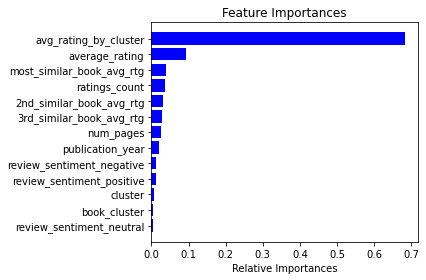

In [32]:
# Plot the relative importances
features = data.drop('rating', axis=1).columns
importances = model3.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importances')

plt.tight_layout()
plt.savefig('../figures/feature_importances.png')

plt.show()

## Saving Model metrics

In [34]:
model_metrics = {
    'model type' : 'Random Forest Classifier',
    'hyperparameters' : {'max_depth': 15, 
                         'min_samples_leaf': 5, 
                         'n_estimators': 300},
    'performance' : classification_report(y_test, y_pred3, digits=2)
}

In [43]:
import json
import os

with open('../model/model_metrics.json','w')as fp:
    json.dump(model_metrics, fp)
